### Lab-07_1: Tips



##### Maximum Likelihood Estimation (MLE)
- 우리가 수집한 데이터를 가장 잘 설명하는 확률 분포 함수의 파라미터를 찾는 과정
  - 곧, Observation을 가장 잘 설명하는 theta를 찾아내는 과정

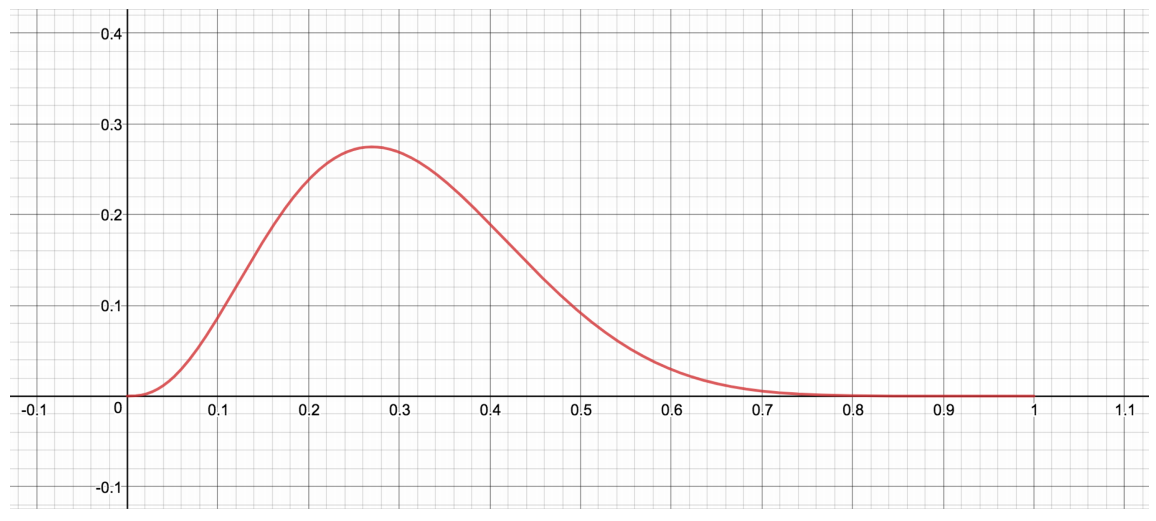




- Optimization 은 마찬가지로 Gradient Descent 를 통해!
- MLE -> Overfitting 이 숙명적으로 발생
  - 더 많은 학습 데이터 + 더 적은 양의 feature + 규제 필요!

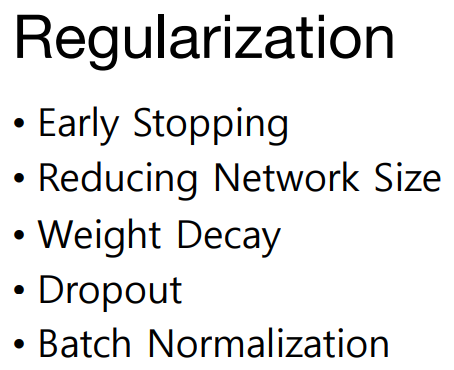

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

##### Training & Test Datasets

In [ ]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

##### Model

In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)

model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

# training
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.cross_entropy(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

# test (validation)
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [ ]:
## Run

# train
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.280268
Epoch    1/20 Cost: 1.007498
Epoch    2/20 Cost: 0.999968
Epoch    3/20 Cost: 0.992704
Epoch    4/20 Cost: 0.985657
Epoch    5/20 Cost: 0.978815
Epoch    6/20 Cost: 0.972169
Epoch    7/20 Cost: 0.965709
Epoch    8/20 Cost: 0.959425
Epoch    9/20 Cost: 0.953312
Epoch   10/20 Cost: 0.947360
Epoch   11/20 Cost: 0.941562
Epoch   12/20 Cost: 0.935913
Epoch   13/20 Cost: 0.930405
Epoch   14/20 Cost: 0.925033
Epoch   15/20 Cost: 0.919792
Epoch   16/20 Cost: 0.914675
Epoch   17/20 Cost: 0.909678
Epoch   18/20 Cost: 0.904796
Epoch   19/20 Cost: 0.900025


In [ ]:
# test
test(model, optimizer, x_test, y_test)

Accuracy: 100.0% Cost: 0.390032


##### Learning Rate

In [ ]:
# Learning Rate 를 크게 한 경우
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e5)
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.341574
Epoch    1/20 Cost: 720868.875000
Epoch    2/20 Cost: 1323871.000000
Epoch    3/20 Cost: 1948224.125000
Epoch    4/20 Cost: 887933.500000
Epoch    5/20 Cost: 1134161.875000
Epoch    6/20 Cost: 1173993.750000
Epoch    7/20 Cost: 1576996.000000
Epoch    8/20 Cost: 1256036.875000
Epoch    9/20 Cost: 1141058.500000
Epoch   10/20 Cost: 691181.312500
Epoch   11/20 Cost: 1377912.000000
Epoch   12/20 Cost: 1830121.125000
Epoch   13/20 Cost: 563849.375000
Epoch   14/20 Cost: 1395108.625000
Epoch   15/20 Cost: 923993.750000
Epoch   16/20 Cost: 705254.312500
Epoch   17/20 Cost: 1287933.500000
Epoch   18/20 Cost: 914603.687500
Epoch   19/20 Cost: 886079.937500


In [ ]:
# Learning Rate 를 작게 한 경우
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 1.334308
Epoch    2/20 Cost: 1.047911
Epoch    3/20 Cost: 0.996043
Epoch    4/20 Cost: 0.985740
Epoch    5/20 Cost: 0.977224
Epoch    6/20 Cost: 0.970065
Epoch    7/20 Cost: 0.963589
Epoch    8/20 Cost: 0.957561
Epoch    9/20 Cost: 0.951825
Epoch   10/20 Cost: 0.946302
Epoch   11/20 Cost: 0.940942
Epoch   12/20 Cost: 0.935719
Epoch   13/20 Cost: 0.930613
Epoch   14/20 Cost: 0.925613
Epoch   15/20 Cost: 0.920711
Epoch   16/20 Cost: 0.915902
Epoch   17/20 Cost: 0.911182
Epoch   18/20 Cost: 0.906547
Epoch   19/20 Cost: 0.901994


##### Data Preprocessing (데이터 전처리)
- 데이터를 zero-center 하고 normalize 하자. 

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

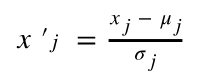

In [ ]:
mu = x_train.mean(dim=0)
sigma = x_train.std(dim=0)
norm_x_train = (x_train - mu) / sigma

print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [ ]:
# 이제 Normalize 와 zero center 한 X로 학습해서 성능 확인!

In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 3개의 원소 받아서 1개의 원소 뱉어줌

    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29785.089844
Epoch    1/20 Cost: 18906.166016
Epoch    2/20 Cost: 12054.674805
Epoch    3/20 Cost: 7702.029785
Epoch    4/20 Cost: 4925.733398
Epoch    5/20 Cost: 3151.632812
Epoch    6/20 Cost: 2016.996094
Epoch    7/20 Cost: 1291.051270
Epoch    8/20 Cost: 826.505249
Epoch    9/20 Cost: 529.207397
Epoch   10/20 Cost: 338.934174
Epoch   11/20 Cost: 217.153564
Epoch   12/20 Cost: 139.206757
Epoch   13/20 Cost: 89.313835
Epoch   14/20 Cost: 57.375465
Epoch   15/20 Cost: 36.928429
Epoch   16/20 Cost: 23.835773
Epoch   17/20 Cost: 15.450429
Epoch   18/20 Cost: 10.077809
Epoch   19/20 Cost: 6.633700


##### Overfitting
- 너무 학습 데이터에 한해 잘 학습해 테스트 데이터에 좋은 성능을 내지 못할 수도 있음
- 해결책
  - 더 많은 학습 데이터
  - 더 적은 양의 feature
  - Regularization

In [ ]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

In [ ]:
model = MultivariateLinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-1)

train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29477.810547
Epoch    2/20 Cost: 18798.513672
Epoch    3/20 Cost: 12059.365234
Epoch    4/20 Cost: 7773.400391
Epoch    5/20 Cost: 5038.264160
Epoch    6/20 Cost: 3290.066406
Epoch    7/20 Cost: 2171.881836
Epoch    8/20 Cost: 1456.433350
Epoch    9/20 Cost: 998.597473
Epoch   10/20 Cost: 705.594727
Epoch   11/20 Cost: 518.073608
Epoch   12/20 Cost: 398.057220
Epoch   13/20 Cost: 321.242920
Epoch   14/20 Cost: 272.078247
Epoch   15/20 Cost: 240.609131
Epoch   16/20 Cost: 220.465637
Epoch   17/20 Cost: 207.570602
Epoch   18/20 Cost: 199.314804
Epoch   19/20 Cost: 194.028214
Epoch   20/20 Cost: 190.642029


### Lab-07_2: MNIST - handwritten digits dataset

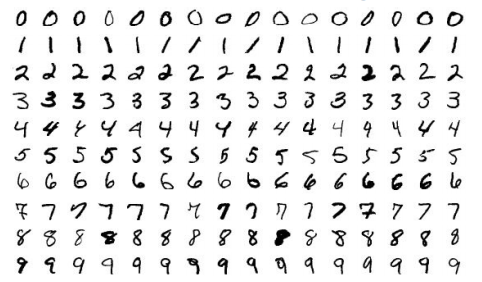

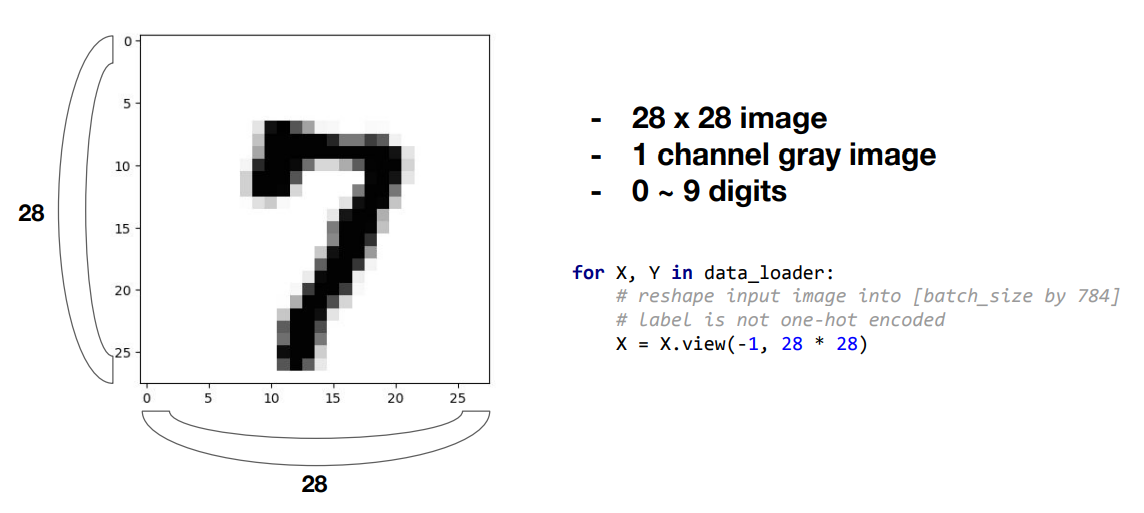

In [ ]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu' # GPU 사용을 위해

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
training_epochs = 15
batch_size = 100

##### Reading data

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

##### Softmax

In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)
# initialization
torch.nn.init.normal_(linear.weight)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 2.743504286
Epoch: 0002 cost = 1.058242321
Epoch: 0003 cost = 0.843668878
Epoch: 0004 cost = 0.738958001
Epoch: 0005 cost = 0.673650026
Epoch: 0006 cost = 0.627024829
Epoch: 0007 cost = 0.590779960
Epoch: 0008 cost = 0.562790036
Epoch: 0009 cost = 0.539131641
Epoch: 0010 cost = 0.520021498
Epoch: 0011 cost = 0.503153026
Epoch: 0012 cost = 0.488555133
Epoch: 0013 cost = 0.475885808
Epoch: 0014 cost = 0.464364558
Epoch: 0015 cost = 0.454120785
Learning finished


##### Test & Visualization

Accuracy: 0.8644999861717224
Label:  8
Prediction:  1


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


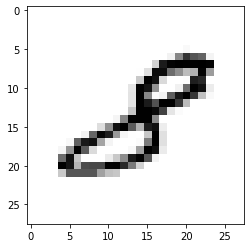

In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
